# Importing the relevant libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the raw data

In [55]:
df = pd.read_csv('50_Startups.csv')

In [56]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preprocessing

## Exploring the descriptive statistics of the data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [58]:
df.describe(include = 'all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


## Dealing with missing values

In [59]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Exploring the PDFs

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

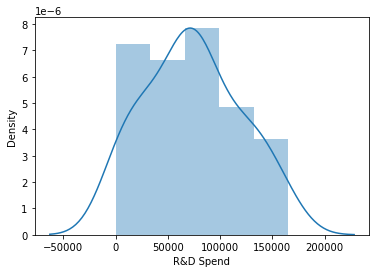

In [60]:
sns.distplot(df['R&D Spend'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

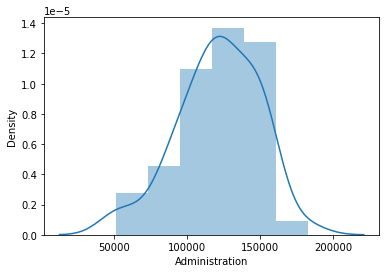

In [61]:
sns.distplot(df['Administration'])

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


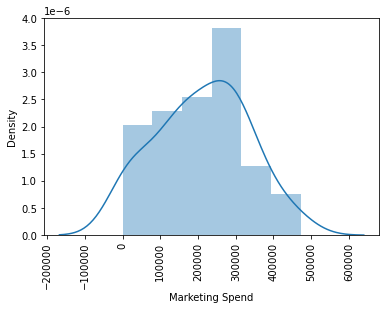

In [62]:
sns.distplot(df['Marketing Spend'])
plt.xticks(rotation = 90);

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

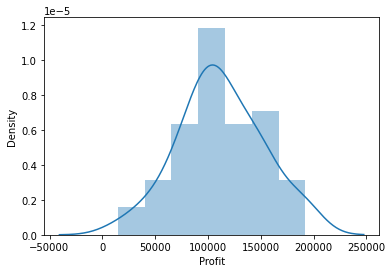

In [63]:
sns.distplot(df['Profit'])

# Dealing with Outliers

In [64]:
q = df['Profit'].quantile(0.01)

In [65]:
q

24967.484900000003

In [66]:
data = df[df['Profit']>q]

In [67]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [138]:
#plt.hist(data['State'], data['Profit'])

In [68]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

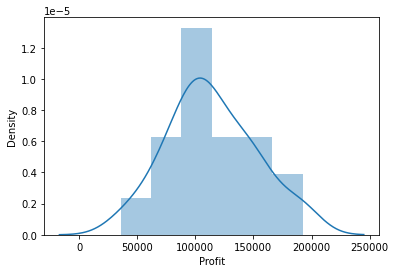

In [69]:
sns.distplot(data['Profit'])

# Checking the OLS assumptions

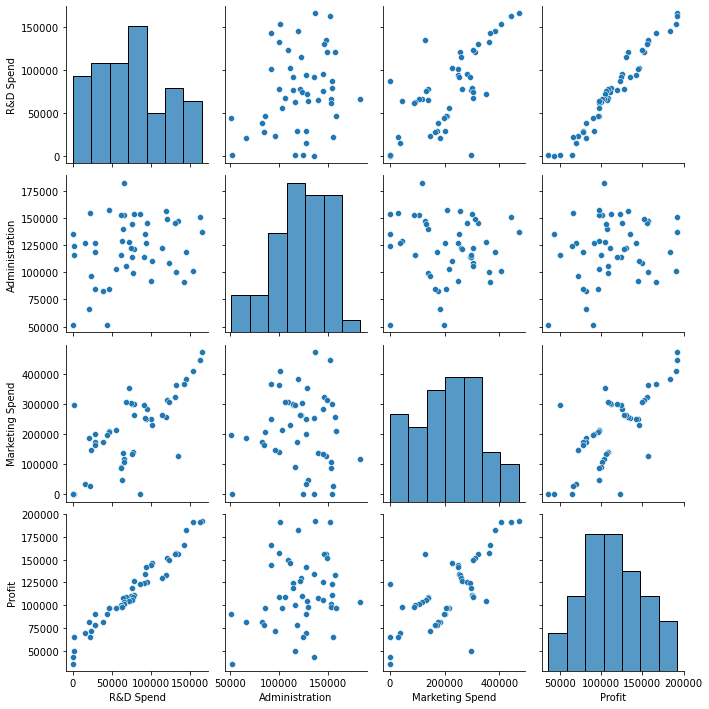

In [71]:
sns.pairplot(data)

# Creating Dummy variables

In [90]:
data = pd.get_dummies(data, drop_first=True)

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
X = data.drop(['Profit'], axis = 1)
y = data['Profit']

In [93]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [139]:
from sklearn.linear_model import LinearRegression

In [99]:
reg = LinearRegression()

In [121]:
reg.fit(X, y)

LinearRegression()

In [122]:
reg_predict = reg.predict(X)

In [123]:
reg_predict

array([190158.28618409, 188917.33941173, 180356.02237705, 171835.12162014,
       170611.03917457, 161933.89508633, 158918.6002949 , 159073.18740304,
       150652.11891919, 155504.73722298, 135154.66779211, 136691.95505187,
       129012.88683581, 129003.66384015, 148977.1655612 , 145223.7466442 ,
       118657.32545573, 129698.99613553, 128809.41361409, 115762.02120794,
       118335.17580929, 117203.47011355, 114924.43992464, 110273.36872409,
       113239.47223178, 104538.86717767, 111129.01456077, 114231.69114063,
       102600.70101363, 102229.27097139, 100199.63682598,  98246.06177655,
       101409.98664848,  98572.02099609,  91728.4426418 ,  90915.06415   ,
        76670.86492154,  91870.12620574,  70608.33124778,  86284.48823984,
        77761.93043353,  76052.89019838,  73607.24323292,  61687.60328099,
        68079.89918775,  49523.99127519,  57967.07007707,  50396.79914563,
        50710.44801469])

In [124]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
Name: Profit, dtype: float64

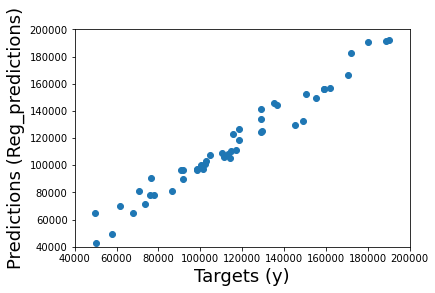

In [125]:
plt.scatter(reg_predict,y)
plt.xlabel('Targets (y)',size=18)
plt.ylabel('Predictions (Reg_predictions)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(40000,200000)
plt.ylim(40000,200000)
plt.show()

# Residuals plot

C:\Users\padma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

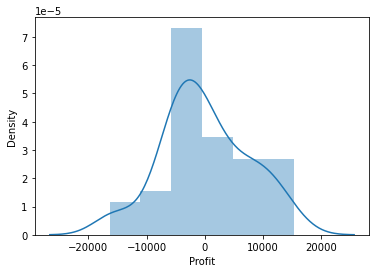

In [126]:
sns.distplot(y-reg_predict)

# r2 value

In [127]:
reg.score(X, y)

0.9618082858227786

# Cross checking after droping the categorical data 'State'

In [141]:
data_new = data[['R&D Spend', 'Administration', 'Marketing Spend']]

In [140]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [142]:
data_new

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [144]:
reg.fit(data_new,y)

LinearRegression()

In [145]:
reg_predict = reg.predict(data_new)

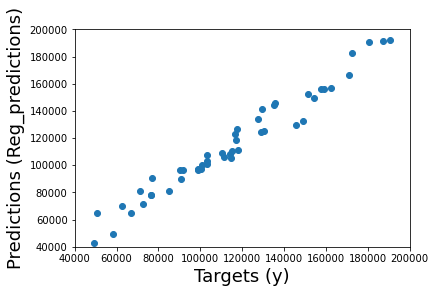

In [146]:
plt.scatter(reg_predict,y)
plt.xlabel('Targets (y)',size=18)
plt.ylabel('Predictions (Reg_predictions)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(40000,200000)
plt.ylim(40000,200000)
plt.show()

In [148]:
from sklearn.metrics import r2_score

In [149]:
score = r2_score(y , reg_predict)

In [150]:
score

0.9613162435129847

# Cross checking after droping Administration

In [151]:
data_without_admin_state = data[['R&D Spend', 'Marketing Spend']]

In [152]:
reg.fit(data_without_admin_state,y)

LinearRegression()

In [153]:
reg_predict_2 = reg.predict(data_without_admin_state)

In [154]:
score1 = r2_score(y, reg_predict_2)

In [155]:
score1

0.9610856807456628